<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the MNIST dataset and split it into a training set
and a test set (take the first 60,000 instances for training, and the remaining
10,000 for testing).

Train a Random Forest classifier on the dataset and time how
long it takes, then evaluate the resulting model on the test set.

Next, use PCA to
reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

Train a new Random Forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next evaluate the classifier on the test set: how
does it compare to the previous classifier?

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

Training a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set

In [3]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [4]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 59.3 s, sys: 239 ms, total: 59.5 s
Wall time: 1min 1s


RandomForestClassifier(random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.9705

Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
X_train_reduced = pca.fit_transform(X_train)

In [7]:
new_clf = RandomForestClassifier(n_estimators=100, random_state=42)

Training a new Random Forest classifier on the reduced dataset and see how long it
takes

In [10]:
X_test_reduced = pca.transform(X_test)
%time new_clf.fit(X_train_reduced, y_train)
y_pred_new = new_clf.predict(X_test_reduced)
accuracy_score(y_pred_new, y_test)

CPU times: user 3min 22s, sys: 452 ms, total: 3min 22s
Wall time: 3min 37s


0.9481

Trying with SGDClassifier

In [11]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)

In [12]:
%time sgd.fit(X_train, y_train)

CPU times: user 3min 18s, sys: 333 ms, total: 3min 18s
Wall time: 3min 19s


SGDClassifier(random_state=42)

In [13]:
y_pred = sgd.predict(X_test)
accuracy_score(y_pred, y_test)

0.874

Now trainig with X_reduced from pca

In [15]:
sgd_pca = SGDClassifier(random_state=42)

In [16]:
%time sgd_pca.fit(X_train_reduced, y_train)

CPU times: user 48.5 s, sys: 83.5 ms, total: 48.6 s
Wall time: 50.9 s


SGDClassifier(random_state=42)

In [17]:
y_pred_pca = sgd_pca.predict(X_test_reduced)
accuracy_score(y_pred_pca, y_test)

0.8959

10.

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
result using Matplotlib.

You can use a scatterplot using 10 different colors to rep‐
resent each image’s target class.

Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance).

You should get a nice visualization
with well-separated clusters of digits.

Try using other dimensionality reduction
algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [18]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [19]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
# n_components to parametr, który określa liczbę wymiarów docelowych, do których dane mają zostać zredukowane
# init="random" - początkowa pozycja punktów w przestrzeni docelowe jest losowa
t_sne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)

In [20]:
%time X_reduced = t_sne.fit_transform(X_train)

CPU times: user 1min 4s, sys: 126 ms, total: 1min 4s
Wall time: 1min 12s


In [21]:
X_reduced[:5]

array([[ 27.29423  , -12.066925 ],
       [  8.205369 , -66.170876 ],
       [ 53.31725  ,  15.1813965],
       [-43.657703 ,  33.87111  ],
       [ 17.937662 ,  27.119612 ]], dtype=float32)

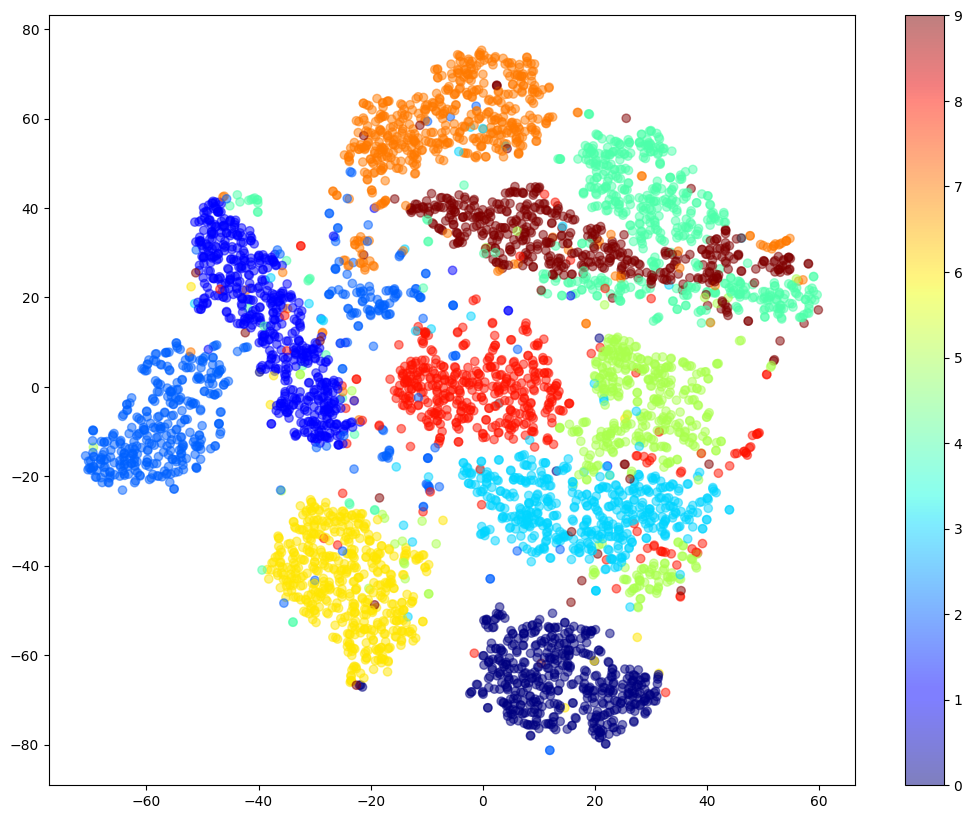

In [30]:
plt.figure(figsize=(13, 10))

# c=y_sample.astype(np.int8) ustawia kolor każdego punktu w zależności od wartości etykiety w zmiennej y_sample

# "jet" - jest to klasyczna mapa kolorów przechodząca od niebieskiego przez zielony i żółty aż do czerwonego,
#  używana często do wizualizacji wartości liczbowych
# są jeszcze: "viridis", "plasma", "coolwarm"

# alpha ustawia przezroczystość punktów na wykresie. Jest to wartość pomiędzy 0 a 1, gdzie:
# alpha=1.0 -  pełna nieprzezroczystość (punkty są w pełni widoczne),
# alpha=0.0 -  pełna przezroczystość (punkty są niewidoczne),
# alpha=0.5 -  punkty są półprzezroczyste (częściowo widoczne, co jest przydatne, gdy punkty się nakładają, aby lepiej zobaczyć ich gęstość).
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.colorbar()
plt.show()

Most digits are nicely separated from the others, even though t-SNE wasn't given the targets: it just identified clusters of similar images. But there is still a bit of overlap. For example, the 3s and the 5s overlap a lot (on the right side of the plot), and so do the 4s and the 9s (in the top-right corner)

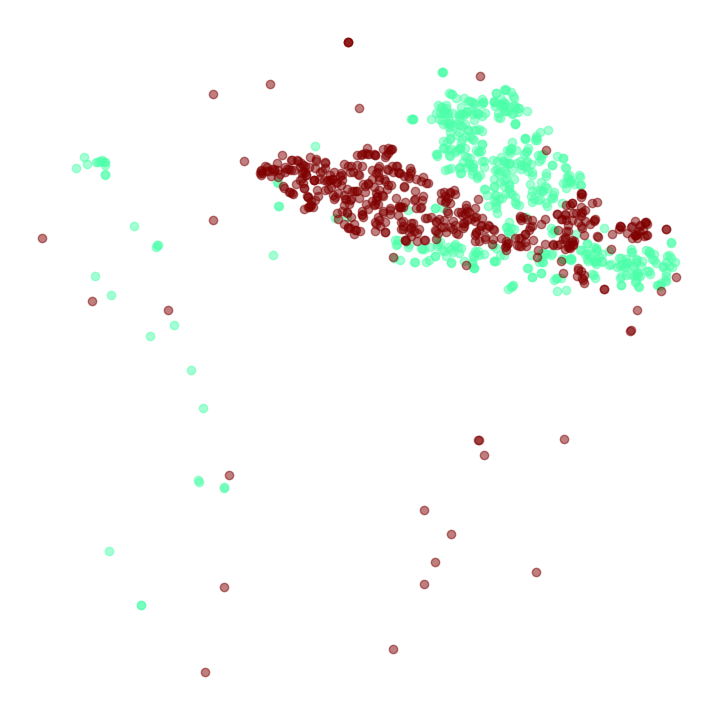

In [31]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_train == digit, 0], X_reduced[y_train == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

y_train == '4': Porównuje każdy element w y_train z wartością '4'.

Wynikiem będzie tablica logiczna, gdzie elementy będą miały wartość True tam, gdzie etykieta wynosi '4', a False tam, gdzie etykieta jest inna.

y_train == '9': To samo, tylko dla wartości '9'

| - (OR) łączy te dwie maski. Rezultat idx to maska logiczna, która ma wartość True dla każdego indeksu, gdzie y_train wynosi '4' lub '9', a False dla pozostałyc

In [32]:
idx = (y_train == '4') | (y_train == '9')
X_subset = X_train[idx]
y_subset = y_train[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

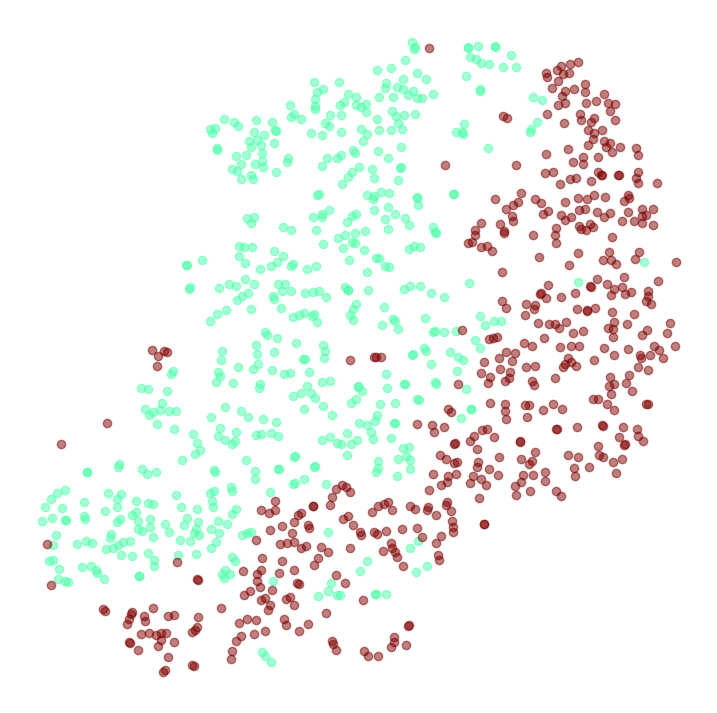

In [33]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

Much better, although there's still a bit of overlap. Perhaps some 4s really do look like 9s, and vice versa. It would be nice if we could visualize a few digits from each region of this plot, to understand what's going on. In fact, let's do that now.

Exercise: Alternatively, you can write colored digits at the
location of each instance, or even plot scaled-down versions of the digit images
themselves (if you plot all digits, the visualization will be too cluttered, so you
should either draw a random sample or plot an instance only if no other instance
has already been plotted at a close distance).

You should get a nice visualization with well-separated clusters of digits.

In [35]:
y_train[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

In [36]:
X_reduced[:5]

array([[ 27.29423  , -12.066925 ],
       [  8.205369 , -66.170876 ],
       [ 53.31725  ,  15.1813965],
       [-43.657703 ,  33.87111  ],
       [ 17.937662 ,  27.119612 ]], dtype=float32)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below

    # neighbors przechowuje współrzędne punktów (obrazów lub tekstów) już umieszczonych na wykresie.
    # Na początku wstawiamy fikcyjny punkt daleko od zera, aby uniknąć potrzeby stosowania instrukcji warunkowej w dalszej części kodu
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory

    plt.figure(figsize=figsize)
    # cmap:  mapa kolorów jet, która przypisuje kolor każdej etykiecie cyfry w zależności od wartości
    cmap = plt.cm.jet

    # wyodrebniam wszystkie mozliwe cyfry (bez powtorzen)
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")

    # Pobieram bieżące osie (axes), aby móc dodawać obrazy lub tekst do wykresu
    ax = plt.gca()  # get current axes

    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

First let's show colored digits (not images), for all 5,000 images:

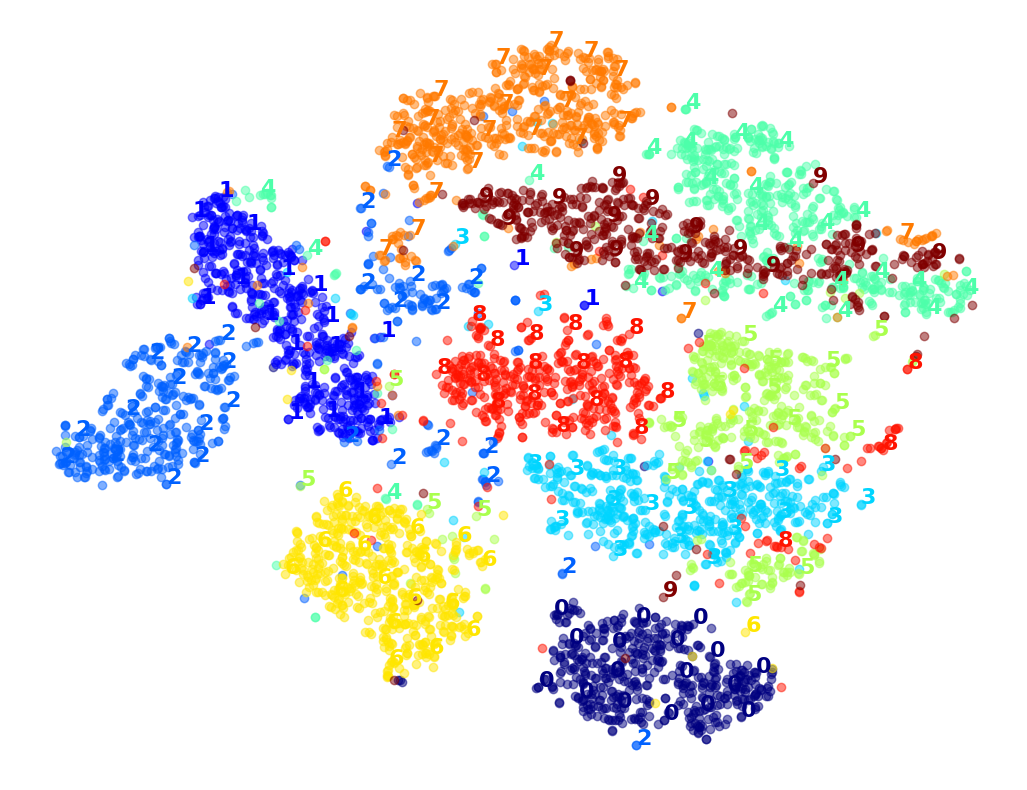

In [38]:
plot_digits(X_reduced, y_train)

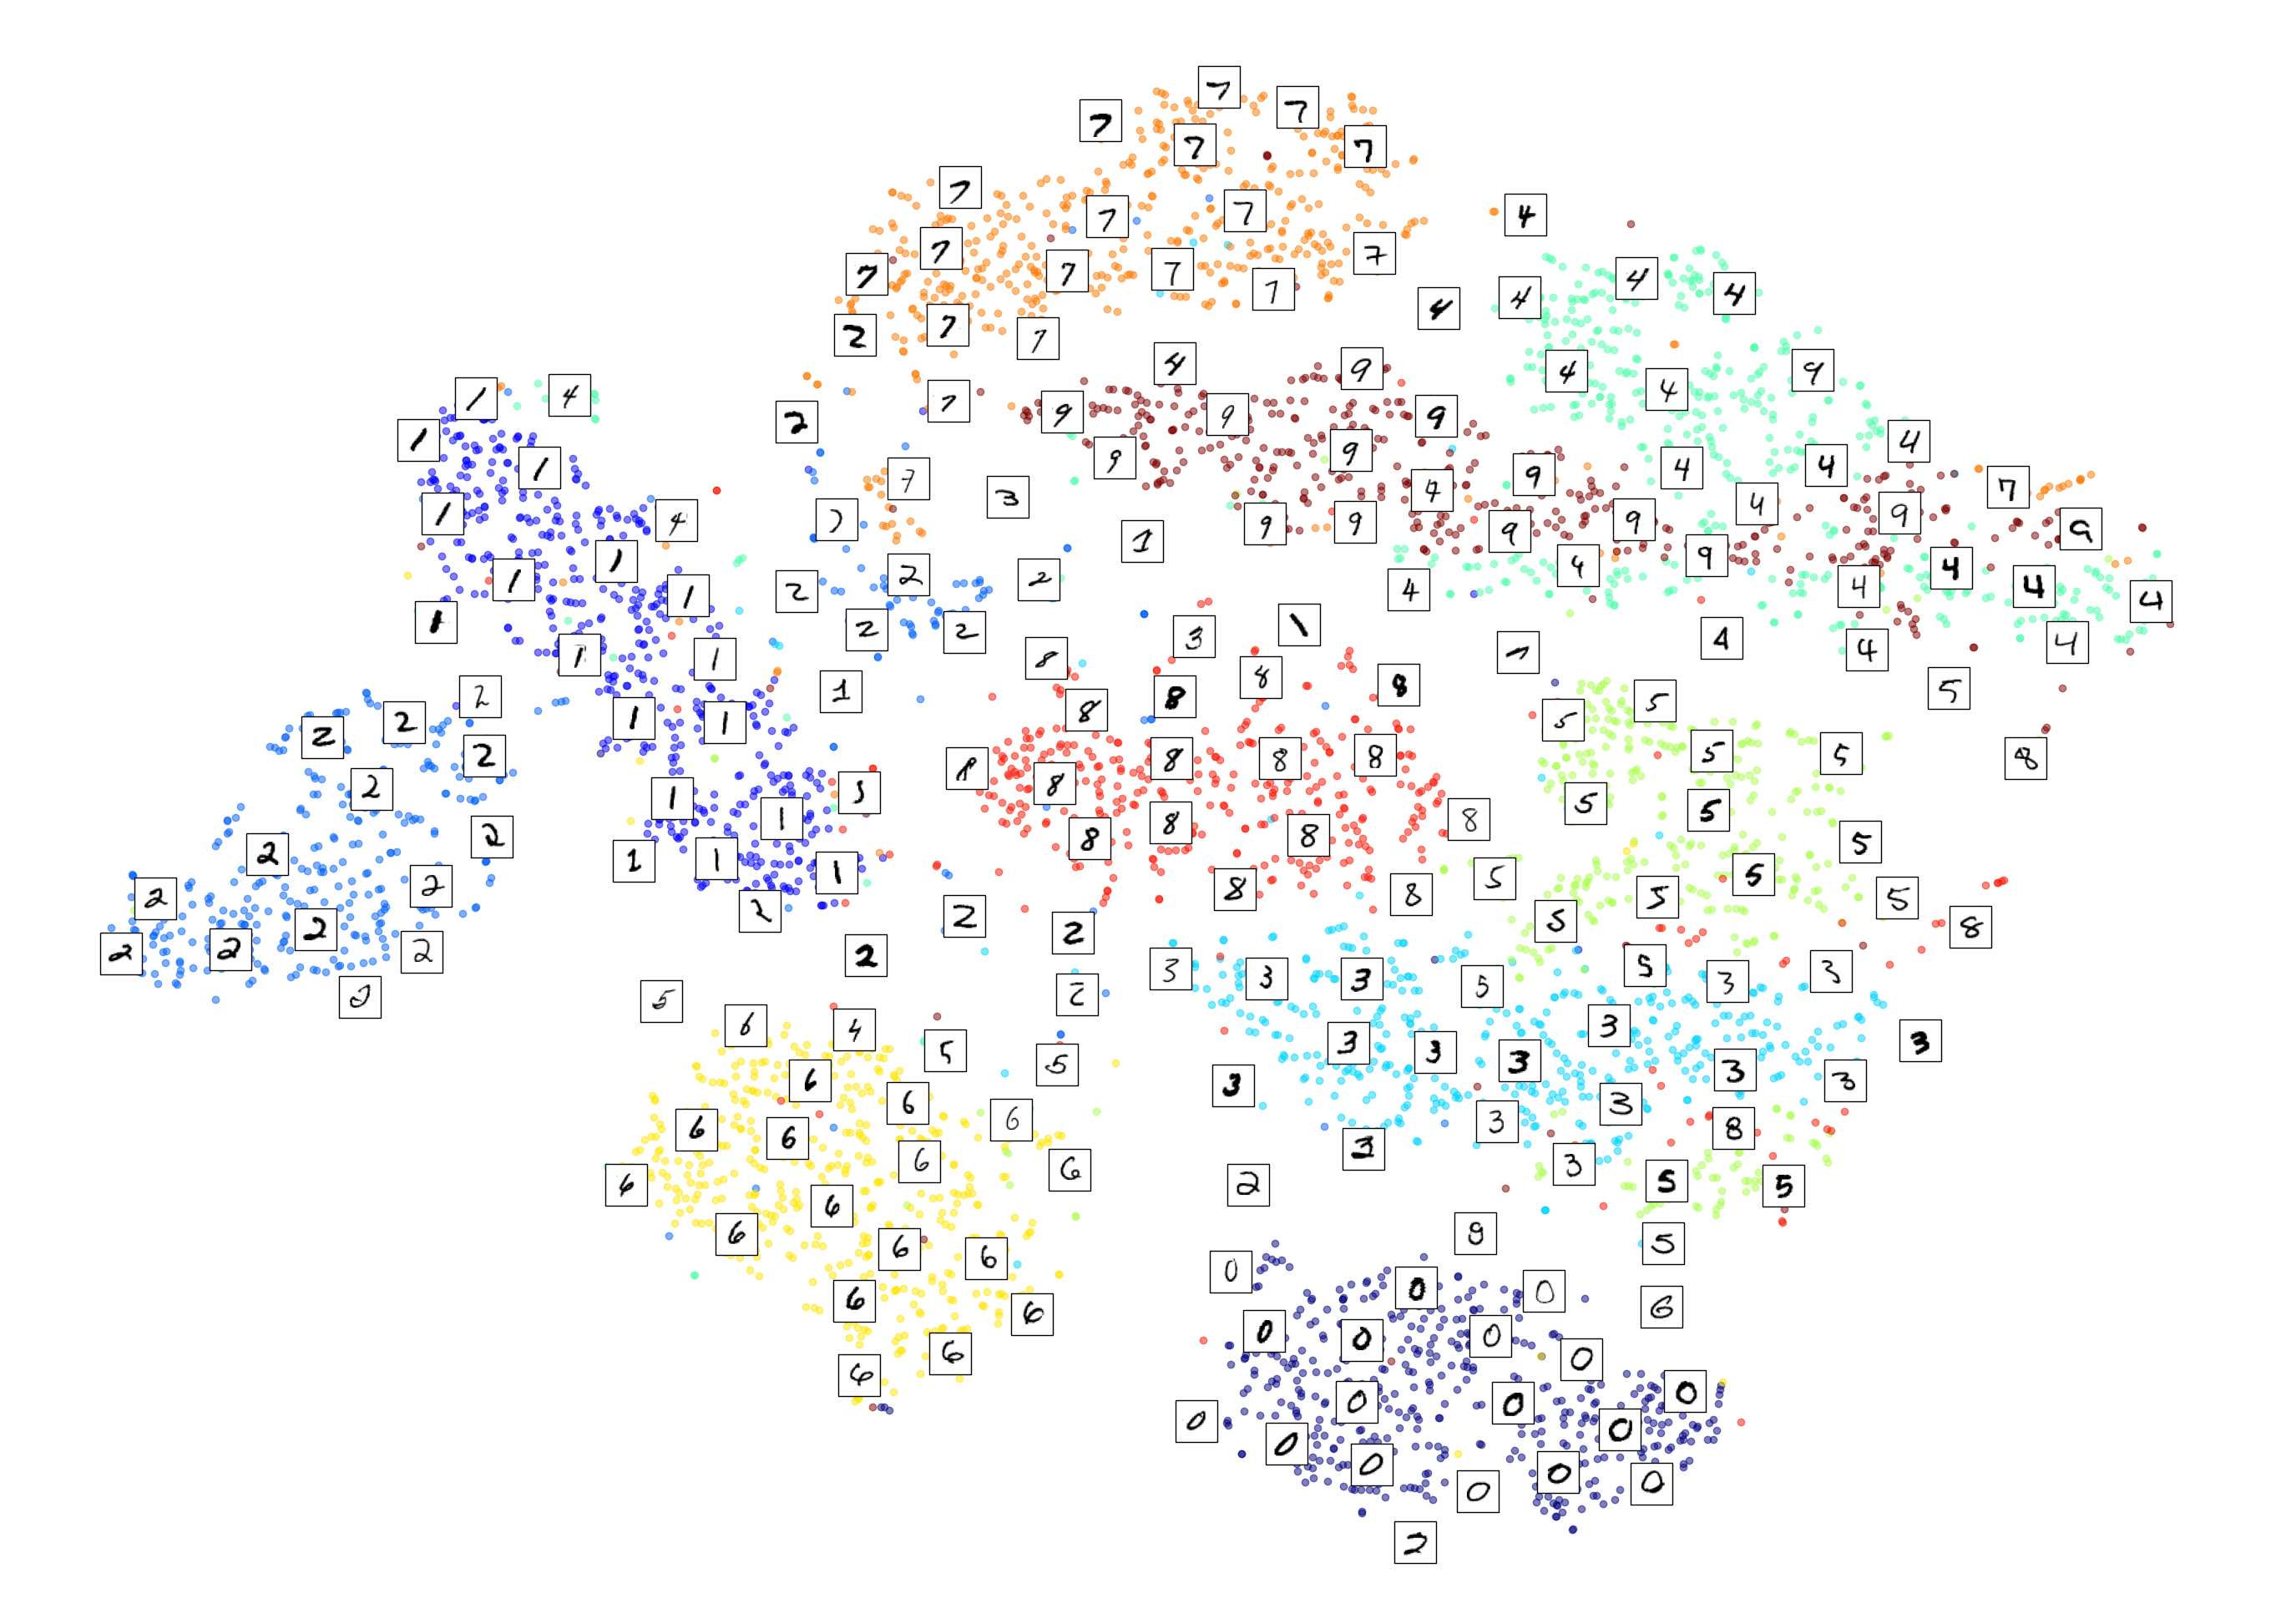

In [39]:
plot_digits(X_reduced, y_train, images=X_train, figsize=(35, 25))

Back to the 3s and 5s problem with simillarity

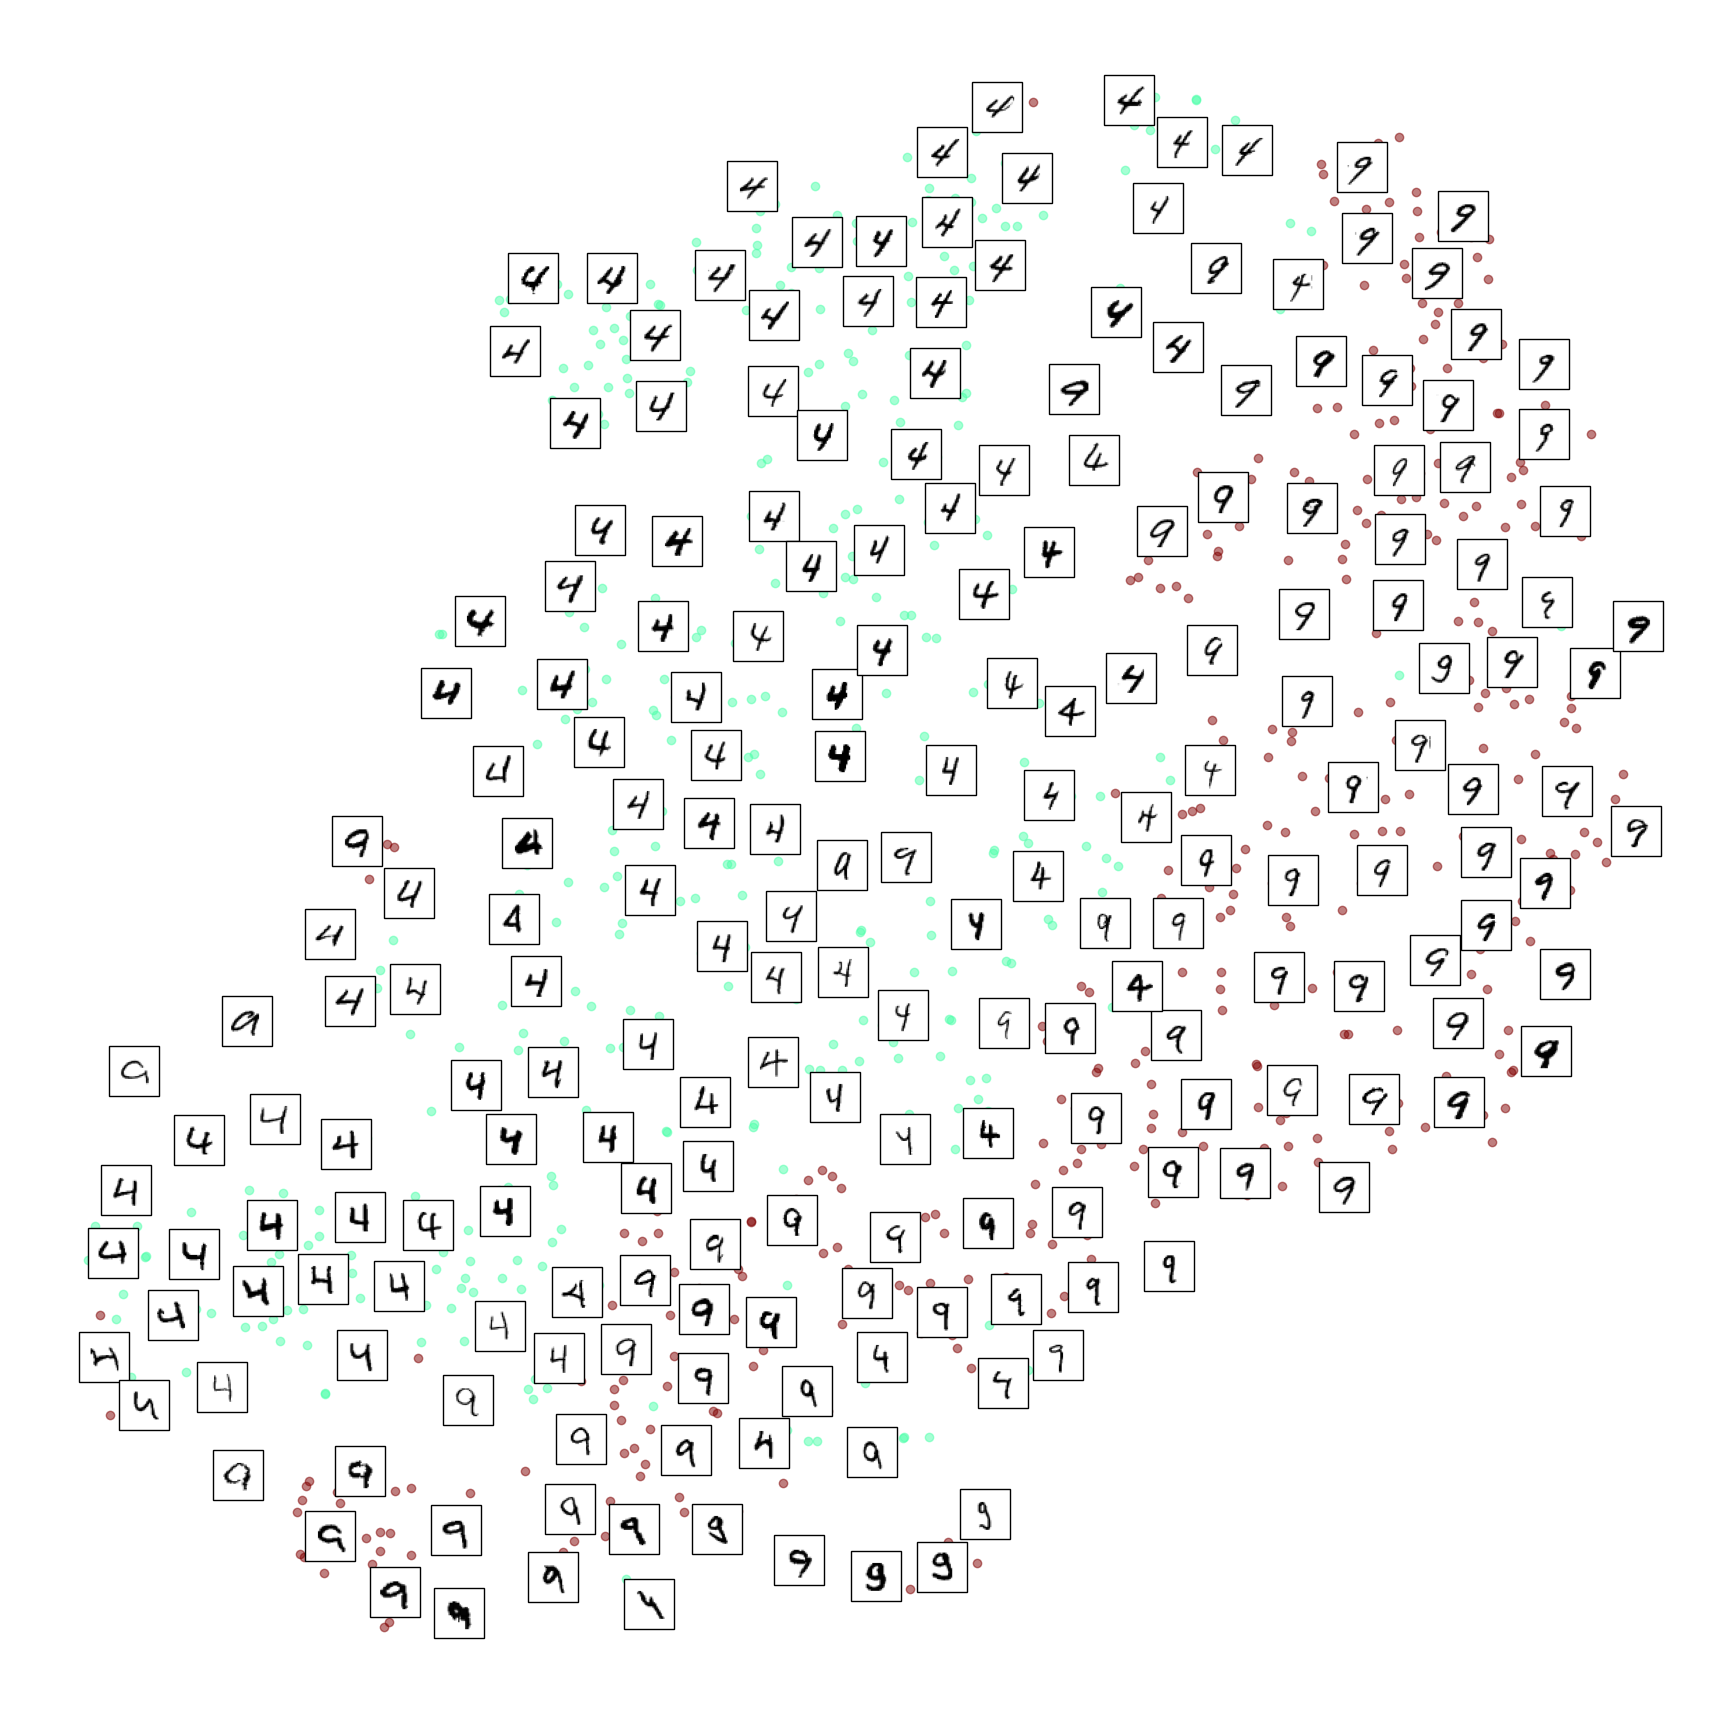

In [40]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

Exercise: Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

PCA

CPU times: user 489 ms, sys: 91.7 ms, total: 581 ms
Wall time: 519 ms


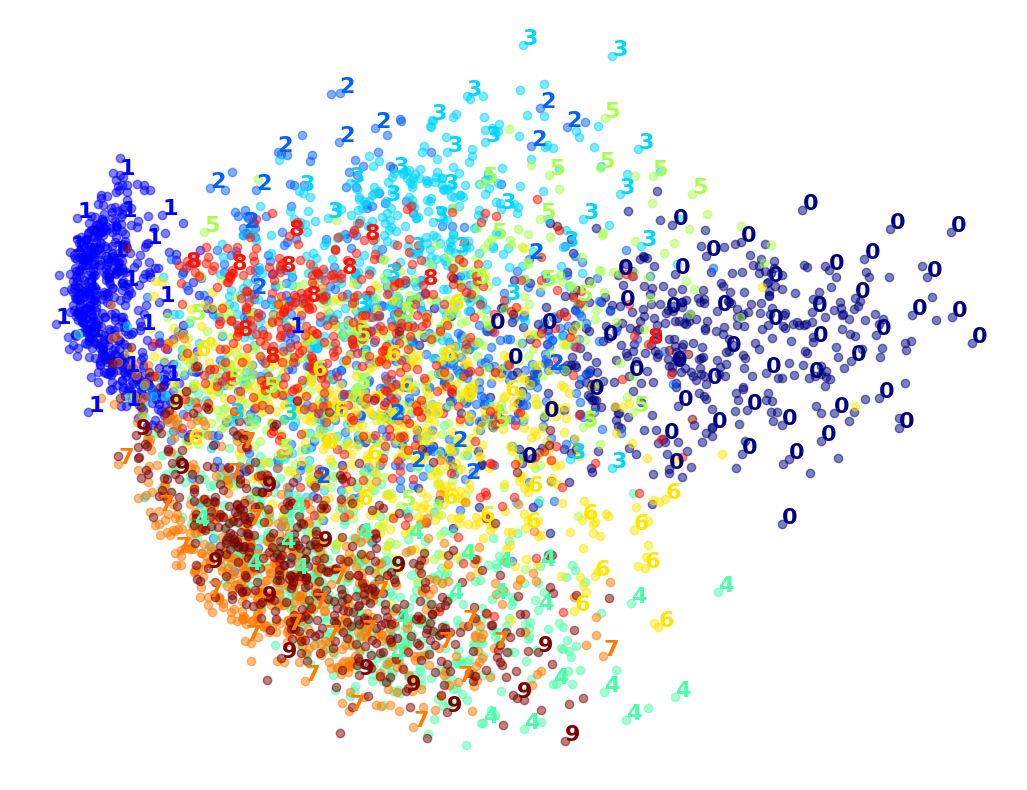

In [41]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_train)
plot_digits(X_pca_reduced, y_train)
plt.show()

LLE

CPU times: user 4.91 s, sys: 30.8 ms, total: 4.94 s
Wall time: 5.54 s


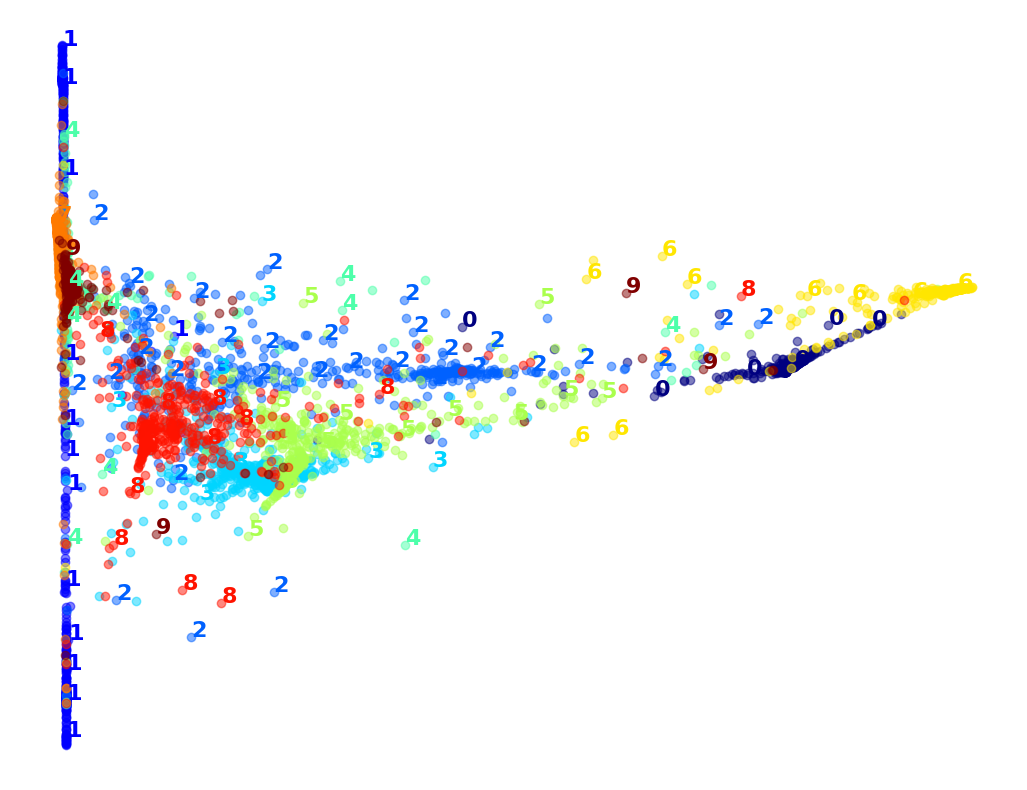

In [44]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_train)
plot_digits(X_lle_reduced, y_train)
plt.show()

Applying PCA first, preserving 95% of the variance

CPU times: user 5.91 s, sys: 108 ms, total: 6.01 s
Wall time: 4.97 s


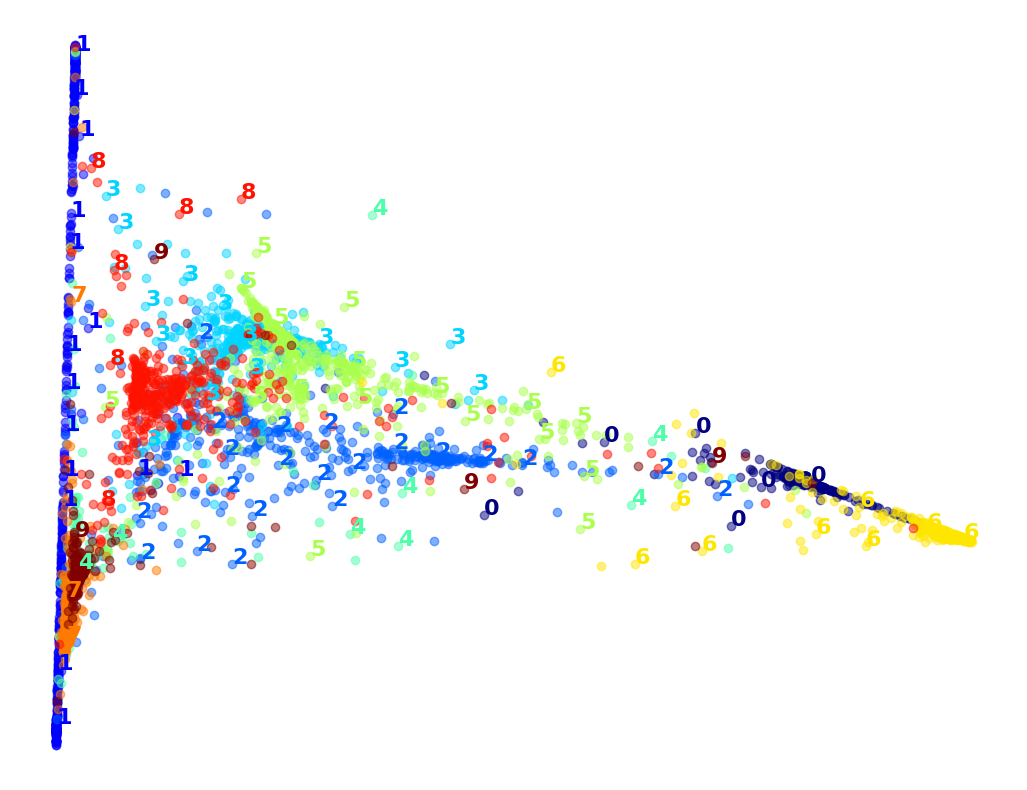

In [47]:
from sklearn.pipeline import make_pipeline
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_train)
plot_digits(X_pca_lle_reduced, y_train)
plt.show()

LDA

CPU times: user 4.88 s, sys: 156 ms, total: 5.03 s
Wall time: 5.59 s


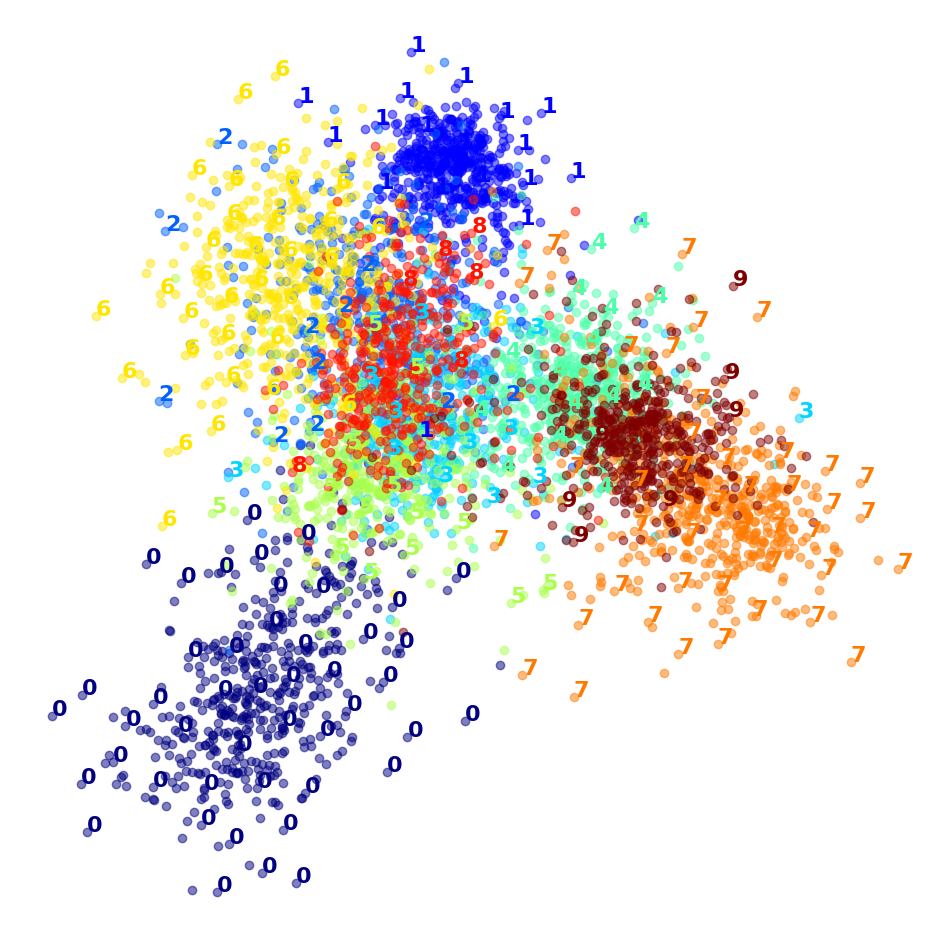

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_train, y_train)
plot_digits(X_lda_reduced, y_train, figsize=(12, 12))
plt.show()